### aim: spot test of who mostly contributes to primary productivity

### date: 

In [47]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [49]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [50]:
import prophy_fxns as pf

## spot testing backcalculation of ppint

In [51]:
reload(pf)
yr = 1954; x = 125; y = 100; t = 4; z = 0

def spottest_ppt(yr,x,y,t,z):
    
    print(f'TOM12_TJ_LA02, {yr}, x {x} y {y} z {z} t {t}')
    LoP = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_LoP_T.nc'
    diad = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc'
    ptrc = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_ptrc_T.nc'
    grid = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_grid_T.nc'

    pftv = ['dia','mix','coc','pic','pha','fix']

    diad = xr.open_dataset(diad)
    ptrc = xr.open_dataset(ptrc)
    grid = xr.open_dataset(grid)
    LoP = xr.open_dataset(LoP)



    ppt = diad['PPT'][t,z,y,x].values 
    ln = (diad['PPT'].long_name)
    pptunits = (diad['PPT'].units)

    pftv = ['dia','mix','coc','pic','pha','fix']
    ind = 0
    ar = np.zeros([6])
    for p in pftv:
        P = p.upper()
        conc = ptrc[P][t,z,y,x].values
        units = ptrc[P].units
        prophy = pf.get_prophytot(x, y, z, t, p, ptrc, LoP, grid, diad)
        #print(prophy.values)
        print(f'{P} conc: {conc}, ppt: {prophy.values} ({units})')


        ar[ind] = prophy

        ind = ind+1

    print(f'pp calculated (sum all pfts) (conv mol/m3): {np.nansum(ar)}')
    print(f'pp output (mol/m3): {ppt}')
    print(f'ratio total calc pp to output pp {np.nansum(ar)/ppt}')
    print()

yr = 1954; x = 125; y = 100; t = 4; z = 0
spottest_ppt(yr,x,y,t,z)

yr = 1954; x = 125; y = 40; t = 6; z = 0
spottest_ppt(yr,x,y,t,z)

yr = 1954; x = 60; y = 40; t = 1; z = 0
spottest_ppt(yr,x,y,t,z)
#pf.get_prophytot(x, y, z, t, pft, ptrcd, LoPd, gridd, diadd)

TOM12_TJ_LA02, 1954, x 125 y 100 z 0 t 4
DIA conc: 7.246434563512594e-10, ppt: 4.081765022329488e-12 (mol/L)
MIX conc: 5.326225682722452e-09, ppt: 3.9377219683236925e-11 (mol/L)
COC conc: 1.6677461189829046e-06, ppt: 6.761088007572719e-09 (mol/L)
PIC conc: 6.440674837904226e-08, ppt: 2.1089597695017202e-10 (mol/L)
PHA conc: 1.7053629342012044e-10, ppt: 3.671912325494466e-13 (mol/L)
FIX conc: 1.4535605608045898e-08, ppt: 8.384205282702646e-12 (mol/L)
pp calculated (sum all pfts) (conv mol/m3): 7.02419436574371e-09
pp output (mol/m3): 9.533166256403547e-09
ratio total calc pp to output pp 0.736816517914546

TOM12_TJ_LA02, 1954, x 125 y 40 z 0 t 6
DIA conc: 1.570574892362231e-09, ppt: 3.026967533728542e-12 (mol/L)
MIX conc: 2.147153121967449e-09, ppt: 9.754714704479427e-12 (mol/L)
COC conc: 1.943651284364023e-08, ppt: 2.8468306739252755e-11 (mol/L)
PIC conc: 2.941576155990333e-07, ppt: 3.997562203366971e-10 (mol/L)
PHA conc: 5.822648745379411e-07, ppt: 1.4497550831545291e-09 (mol/L)
FIX c

## tgfunc

168


Text(0.5, 0, 'deg C')

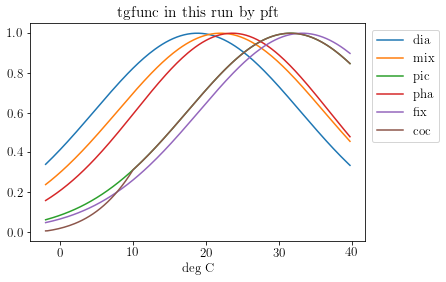

In [52]:
pftv = ['dia','mix','pic','pha','fix']

tsn = np.arange(-2,40,0.25)
print(len(tsn))
funcs = np.zeros([5,len(tsn)])

for i in range(0,5):
    funcs[i,:] = pf.get_tgfunc(tsn,pftv[i])

tsn = np.arange(-2,40,0.25)
cocs = np.copy(tsn)

for i in range(0,len(tsn)):
    cocs[i] = pf.get_tgfunc(tsn[i],'coc')
plt.figure()
for i in range(0,5):
    plt.plot(tsn, funcs[i,:], label = pftv[i])
plt.plot(tsn, cocs[:], label = 'coc')
    
plt.legend(bbox_to_anchor = [1,1])
plt.title('tgfunc in this run by pft')
plt.xlabel('deg C')

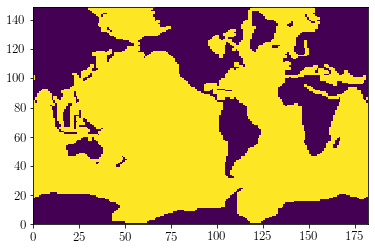

In [53]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

plt.pcolormesh(tmesh.tmask[0,0,:,:])

## the industrial calculator for the code is here

    ~/scratch/LimitsOfPhytoplankton]$ sbatch < extractRunner.bsub

## a 1-square netcdf outputter for example plots is below

In [54]:
ex = True

yr = 1950
y1 = 110; y2 = 111
x1 = 130; x2 = 131

if ex:
    pftv = ['dia','mix','coc','pic','pha','fix']

    for yr in range(1950,1953):

        LoP = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_LoP_T.nc'
        diad = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc'
        ptrc = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_ptrc_T.nc'
        grid = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_grid_T.nc'
        tdir = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/testWhoContributes/'

        ptrcd, LoPd, gridd, diadd = pf.get_datasets(LoP, diad, ptrc, grid)

        for pft in pftv:
            tstr = f'ORCA2_1m_{yr}0101_{yr}1231_prophy_{pft}_T.nc'
            print(tstr)
            savestr = f'{tdir}/{tstr}'




            tsn = gridd.votemper.values
            prophyar = np.zeros_like(tsn)
            tnam = f'pp_{pft}'
            gridd[tnam] = gridd.votemper.copy()

            tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')



            ## for natl only
            t1 = time.time()
            for t in range(0,12):

                for x in range(x1,x2):
                    for y in range(y1,y2): #natl

                        for z in range(0,16):
                            # for pft in pftv:
                            if tmesh.tmask[0,z,y,x] == 0:
                                pass
                            else:
                                prophyar[t,z,y,x] = pf.get_prophytot(x, y, z, t, pft, ptrcd, LoPd, gridd, diadd)
                t2 = time.time()
            print(t2-t1)

            gridd[tnam].values = prophyar
            w_sel = gridd[tnam]
            w_sel.to_netcdf(savestr)

ORCA2_1m_19500101_19501231_prophy_dia_T.nc
7.3488852977752686
ORCA2_1m_19500101_19501231_prophy_mix_T.nc
7.624475479125977
ORCA2_1m_19500101_19501231_prophy_coc_T.nc
7.035813570022583
ORCA2_1m_19500101_19501231_prophy_pic_T.nc
4.831234693527222
ORCA2_1m_19500101_19501231_prophy_pha_T.nc
5.33518123626709
ORCA2_1m_19500101_19501231_prophy_fix_T.nc
3.928105592727661
ORCA2_1m_19510101_19511231_prophy_dia_T.nc
5.6109864711761475
ORCA2_1m_19510101_19511231_prophy_mix_T.nc
5.25945520401001
ORCA2_1m_19510101_19511231_prophy_coc_T.nc
5.604135751724243
ORCA2_1m_19510101_19511231_prophy_pic_T.nc
5.304892539978027
ORCA2_1m_19510101_19511231_prophy_pha_T.nc
5.033844470977783
ORCA2_1m_19510101_19511231_prophy_fix_T.nc
6.395906686782837
ORCA2_1m_19520101_19521231_prophy_dia_T.nc
8.937516927719116
ORCA2_1m_19520101_19521231_prophy_mix_T.nc
5.982454776763916
ORCA2_1m_19520101_19521231_prophy_coc_T.nc
6.041620969772339
ORCA2_1m_19520101_19521231_prophy_pic_T.nc
4.4713661670684814
ORCA2_1m_19520101_19521

In [55]:
# yr = 1950
# y1 = 110; y2 = 111
# x1 = 130; x2 = 131
# pft = 'dia'
# pftv = ['dia','mix','coc','pic','pha','fix']
# PFTV = ['DIA','MIX','COC','PIC','PHA','FIX']

LoP = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_LoP_T.nc')
diad = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')
ptrc = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_LA02//ORCA2_1m_{yr}0101_{yr}1231_ptrc_T.nc')
tdir = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/testWhoContributes/'
pp_dia = xr.open_dataset(f'{tdir}/ORCA2_1m_{yr}0101_{yr}1231_prophy_dia_T.nc')
pp_mix = xr.open_dataset(f'{tdir}/ORCA2_1m_{yr}0101_{yr}1231_prophy_mix_T.nc')
pp_coc = xr.open_dataset(f'{tdir}/ORCA2_1m_{yr}0101_{yr}1231_prophy_coc_T.nc')
pp_pic = xr.open_dataset(f'{tdir}/ORCA2_1m_{yr}0101_{yr}1231_prophy_pic_T.nc')
pp_pha = xr.open_dataset(f'{tdir}/ORCA2_1m_{yr}0101_{yr}1231_prophy_pha_T.nc')
pp_fix = xr.open_dataset(f'{tdir}/ORCA2_1m_{yr}0101_{yr}1231_prophy_fix_T.nc')

ds = xr.merge([pp_dia,pp_mix,pp_coc,pp_pic,pp_pha,pp_fix])


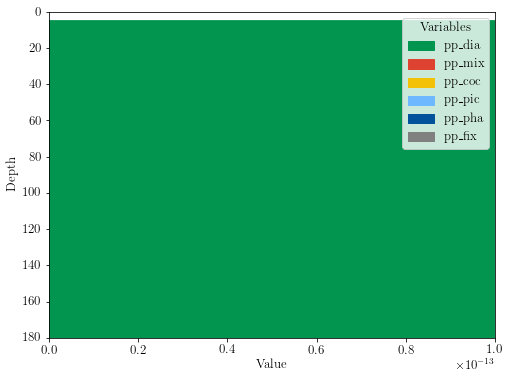

In [56]:
tvars = ['pp_dia','pp_mix','pp_coc','pp_pic','pp_pha','pp_fix']
PFTV = ['DIA','MIX','COC','PIC','PHA','FIX']
metro = ['#02954f', '#de4231','#f3c108','#6db8ff','#01529b','grey']
x1 = 130; x2 = 111
y1 = 110; y2 = 131

#110,130
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Track the cumulative sum to create stacking effect
cumulative = np.zeros_like(ds.deptht.values)
# Plot each variable
ind = 0
for var in tvars:
    # Get the data for the variable
    values = ds[var][6,:,y1,x1]
    
    # Calculate the new cumulative total
    new_cumulative = cumulative + values
    
    # Use fill_betweenx to create the stacked profile
    ax.fill_betweenx(ds.deptht.values, cumulative, new_cumulative,\
                     label=var, color = metro[ind])
    
    # Update cumulative for the next stack
    cumulative = new_cumulative
    ind = ind+1

# Invert y-axis if depth is positive going downward
ax.set_ylim([0,180])
#ax.set_xlim([0,1e-13])
ax.invert_yaxis()


# Add labels and legend
ax.set_xlabel('Value')
ax.set_ylabel('Depth')
ax.legend(title='Variables')
plt.show()

## a nice example depth profile

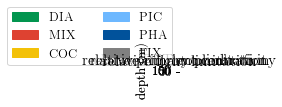

In [57]:

metro = ['#02954f', '#de4231','#f3c108','#6db8ff','#01529b','grey']

fact = 0.
fig, axs = plt.subplots(2,2, figsize=(12*fact, 14*fact), \
                        facecolor='w', edgecolor='k'\
                       , sharey=True)
axs = axs.ravel()

tvars = ['pp_dia','pp_mix','pp_coc','pp_pic','pp_pha','pp_fix']
PFTV = ['DIA','MIX','COC','PIC','PHA','FIX']

x1 = 130; y1 = 110; t = 6

# Track the cumulative sum to create stacking effect
cumulative = np.zeros_like(ds.deptht.values)
ind = 0
for var in PFTV:
    values = ptrc[var][t,:,y1,x1]
    new_cumulative = cumulative + values
    axs[0].fill_betweenx(ds.deptht.values, cumulative, new_cumulative,\
                     label=var, color = metro[ind])
    
    # Update cumulative for the next stack
    cumulative = new_cumulative
    ind = ind+1
    
axs[0].legend(loc = 'lower right', ncol = 2)

ind = 0
cumulative = np.zeros_like(ds.deptht.values)
for var in tvars:
    values = ds[var][t,:,y1,x1]
    new_cumulative = cumulative + values
    axs[1].fill_betweenx(ds.deptht.values, cumulative, new_cumulative,\
                     label=var, color = metro[ind])
    
    # Update cumulative for the next stack
    cumulative = new_cumulative
    ind = ind+1

tvars = ['LV_dia','LV_mix','LV_coc','LV_pic','LV_pha','LV_fix']
ind = 0
for tvar in tvars:

    axs[2].plot(LoP[tvar][t,:,y1,x1],diad.deptht.values,\
                linewidth = 2.5, color = metro[ind])
    
    ind = ind+1
    
tvars = ['lim8light_dia','lim8light_mix','lim8light_coc',\
         'lim8light_pic','lim8light_pha','lim8light_fix']
ind = 0
for tvar in tvars:

    axs[3].plot(diad[tvar][t,:,y1,x1],diad.deptht.values,\
                linewidth = 2.5, color = metro[ind])
    
    ind = ind+1


# Invert y-axis if depth is positive going downward
for i in range(0,4):
    axs[i].set_ylim([5,180])

    axs[i].invert_yaxis()

axs[1].set_xlim([0,1.4e-11])
axs[0].set_xlim([0,3e-6])
#axs[0].set_xlabel('mol L$^{-1}$')

tits = ['relative PFT concentration', 'relative primary productivity',\
        'relative nutrient limitation',\
        'relative light limitation']
for i in range(0,4):
    axs[i].set_xticks([])
    axs[i].set_title(tits[i])
axs[0].set_ylabel('depth (m)')
axs[2].set_ylabel('depth (m)')


# axs[1].set_xlabel('relative PP')
# Add labels and legend

plt.show()